# Exercise 1

**Remember**
   * You are expected to use numpy and scipy libraries where appropriate.  
   * You should run each cell in order from the top of the notebook; there is no need to repeat code between cells
   * Use the "refresh kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it

# Problem Overview

In this problem we will find eigenvalues of the 1D Schrödinger equation using numerical methods.

The time-independent Schrödinger equation in 1D can be written :

\begin{equation}
H \psi = E \psi \tag{1}
\end{equation}

Where the Hamiltonian $H$ is given by 

$$
H = \frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + V \tag{2}
$$

In order to find numerical solutions, we can divide the spatial dimension into $N$ discrete points, $x_i$, and evaluate $\psi$ at each one.  Given this, equation \ref{eq1} becomes a matrix equation, with $\psi$ an $N$-dimensional vector, and $H$ an $(N \times N)$ matrix.  We can then find the eigenvalues and eigenfunctions of the equation using numerical methods.

In order to define the matrix $H$, we can use a discrete approximation of the 2nd derivative :
$$
\frac{d^2}{dx^2} \psi(x_i) \rightarrow \frac{\psi_{i-1} - 2\psi_i + \psi_{i+1}}{(\Delta x)^2}
$$

where $(\Delta x)$ is the distance between discrete points $x_i$. We will choose dimensionless units for each problem, where $x$ is measured in terms of a length $a$, and $E$ is therefore measured in units of $\frac{\hbar^2}{2m a^2}$.  We can therefore write the kinetic energy term of the Hamiltonian as a "tri-diagonal" matrix $D$, which has the leading diagonal :

$$D_{i,i} = \frac{2}{(\Delta x)^2}$$

and the diagonals above and below this are :

$$D_{i,i+1} = D_{i,i-1} = \frac{-1}{(\Delta x)^2}$$

The potential term $V \psi$ can be represented by a matrix where the leading diagonal is the potential evaluated at the $i$-th point in space, $V_{i,i} = V(x_i)$, and all other entries are zero.

Given a potential, we construct the Hamiltonian matrix, $H=D+V$, and then use a numerical method to find the eigenvalues and eigenvectors of $H$.

## Part 1

The quantum harmonic oscillator is a good example to start with, since it has exact analytic solutions. The potential is :
$$V(x) = \frac{1}{2}m \omega^2 x^2$$

If we choose to measure $x$ in units of $\sqrt{\frac{\hbar}{m \omega}}$, then $E$ will be measured in units of $\frac{1}{2}\hbar \omega$, and the potential can be written :

$$V(x_i) = i^2 (\Delta x)^2 = x_i^2$$

You should write a function which takes as argument a discrete set of space points, $x_i$, (ie. an array), and returns the potential at each point, $V_i$ (another array).

In [10]:
import numpy as np
import scipy.linalg as linalg
import scipy.constants as const
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import cmath

#allow latex for plots
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

def potential_qho(x):
    '''Function to generate potential of a quantum harmonic oscillator within the range specified'''
    v = np.square(x)
    return v

Now test your function by plotting the results over a suitable range of $x$.

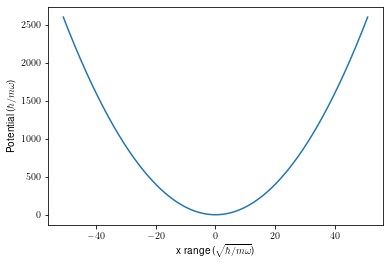

In [11]:
xr=51 #x range (plus and minus)
dx=2*xr/3001 #step size
x=np.arange(-xr,xr+dx,dx) #array of x values
V=potential_qho(x) #generate the potential values over x range

plt.figure() #plot potential
plt.plot(x,V)
plt.xlabel('x range ($\sqrt{\hbar/m \omega}$)')
plt.ylabel('Potential ($\hbar/ m \omega$)')
plt.show()

# Part 2

Now write a function which, given the discrete space points $x_i$ and the potential $V_i$, constructs and returns the Hamiltonian matrix.

In [12]:
def hamiltonian(x, v):
    '''Function to determine the Hamiltonian of a system'''
    v=np.diag(v)
    D = np.full((len(x),len(x)),-1/(np.abs(x[1]-x[0])**2)) #KE matrix
    D = np.tril(np.triu(D,-1),1)
    for i in range(0,len(x)):
        D[i][i]=2/(dx**2)
    H=D+v
        
    return H, D

Test your function by printing the matrix it returns.  You can use small $N$ and check a few elements by hand to ensure they are correct.

In [13]:
H,D=hamiltonian(x,V)
print(D)
print(H)



[[1731.257401  -865.6287005    0.        ...    0.           0.
     0.       ]
 [-865.6287005 1731.257401  -865.6287005 ...    0.           0.
     0.       ]
 [   0.        -865.6287005 1731.257401  ...    0.           0.
     0.       ]
 ...
 [   0.           0.           0.        ... 1731.257401  -865.6287005
     0.       ]
 [   0.           0.           0.        ... -865.6287005 1731.257401
  -865.6287005]
 [   0.           0.           0.        ...    0.        -865.6287005
  1731.257401 ]]
[[4332.257401   -865.6287005     0.         ...    0.
     0.            0.        ]
 [-865.6287005  4328.79171184 -865.6287005  ...    0.
     0.            0.        ]
 [   0.         -865.6287005  4325.32833315 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... 4325.32833315
  -865.6287005     0.        ]
 [   0.            0.            0.         ... -865.6287005
  4328.79171184 -865.6287005 ]
 [   0.            0.            0.         ...  

# Part 3

Now find the first 10 eigenvalues of the quantum harmonic oscillator Hamiltonian using an appropriate scipy routine. You should use a large number of $x$ points, at least 1000, covering sufficient range that the wavefunction falls to zero at the extremities. You should compare the computed eigenvalues with the expected eigenvalues.

In [14]:
e_val_vect=linalg.eig(H)#find eigenvalues and eigenvectors of the hamiltonian using scipy linalg routines
evals=linalg.eigvals(H)#find eigenvalues of the hamiltonian using scipy linalg routines
evects=e_val_vect[1]

sortarr=np.argsort(evals)#find location of eigenvalues from smallest to largest
evect=evects[:,sortarr]#sort eigenvectors from smallest to largest
evals=abs(np.sort(evals))#sort eigenvalues from smallest to largest

comp_arr=np.arange(1,21,2)#comparison array

eigarr=np.vstack((evals[:10],comp_arr))#print for visual comparison
print(eigarr)

print('Are the values close to those expected? True = yes, False = no \n',np.allclose(evals[:10],comp_arr,atol=0.05))



[[ 0.99992779  2.99963894  4.99906119  6.99819448  8.99703874 10.99559391
  12.99385992 14.99183673 16.98952425 18.98692243]
 [ 1.          3.          5.          7.          9.         11.
  13.         15.         17.         19.        ]]
Are the values close to those expected? True = yes, False = no 
 True


Next you should plot the wavefunctions, ie. the eigenvectors.  Rather than plot the wavefunction directly, you should plot the probability density, which is given by $\psi^2$, and indicates the probability to find the particle at position $x$.

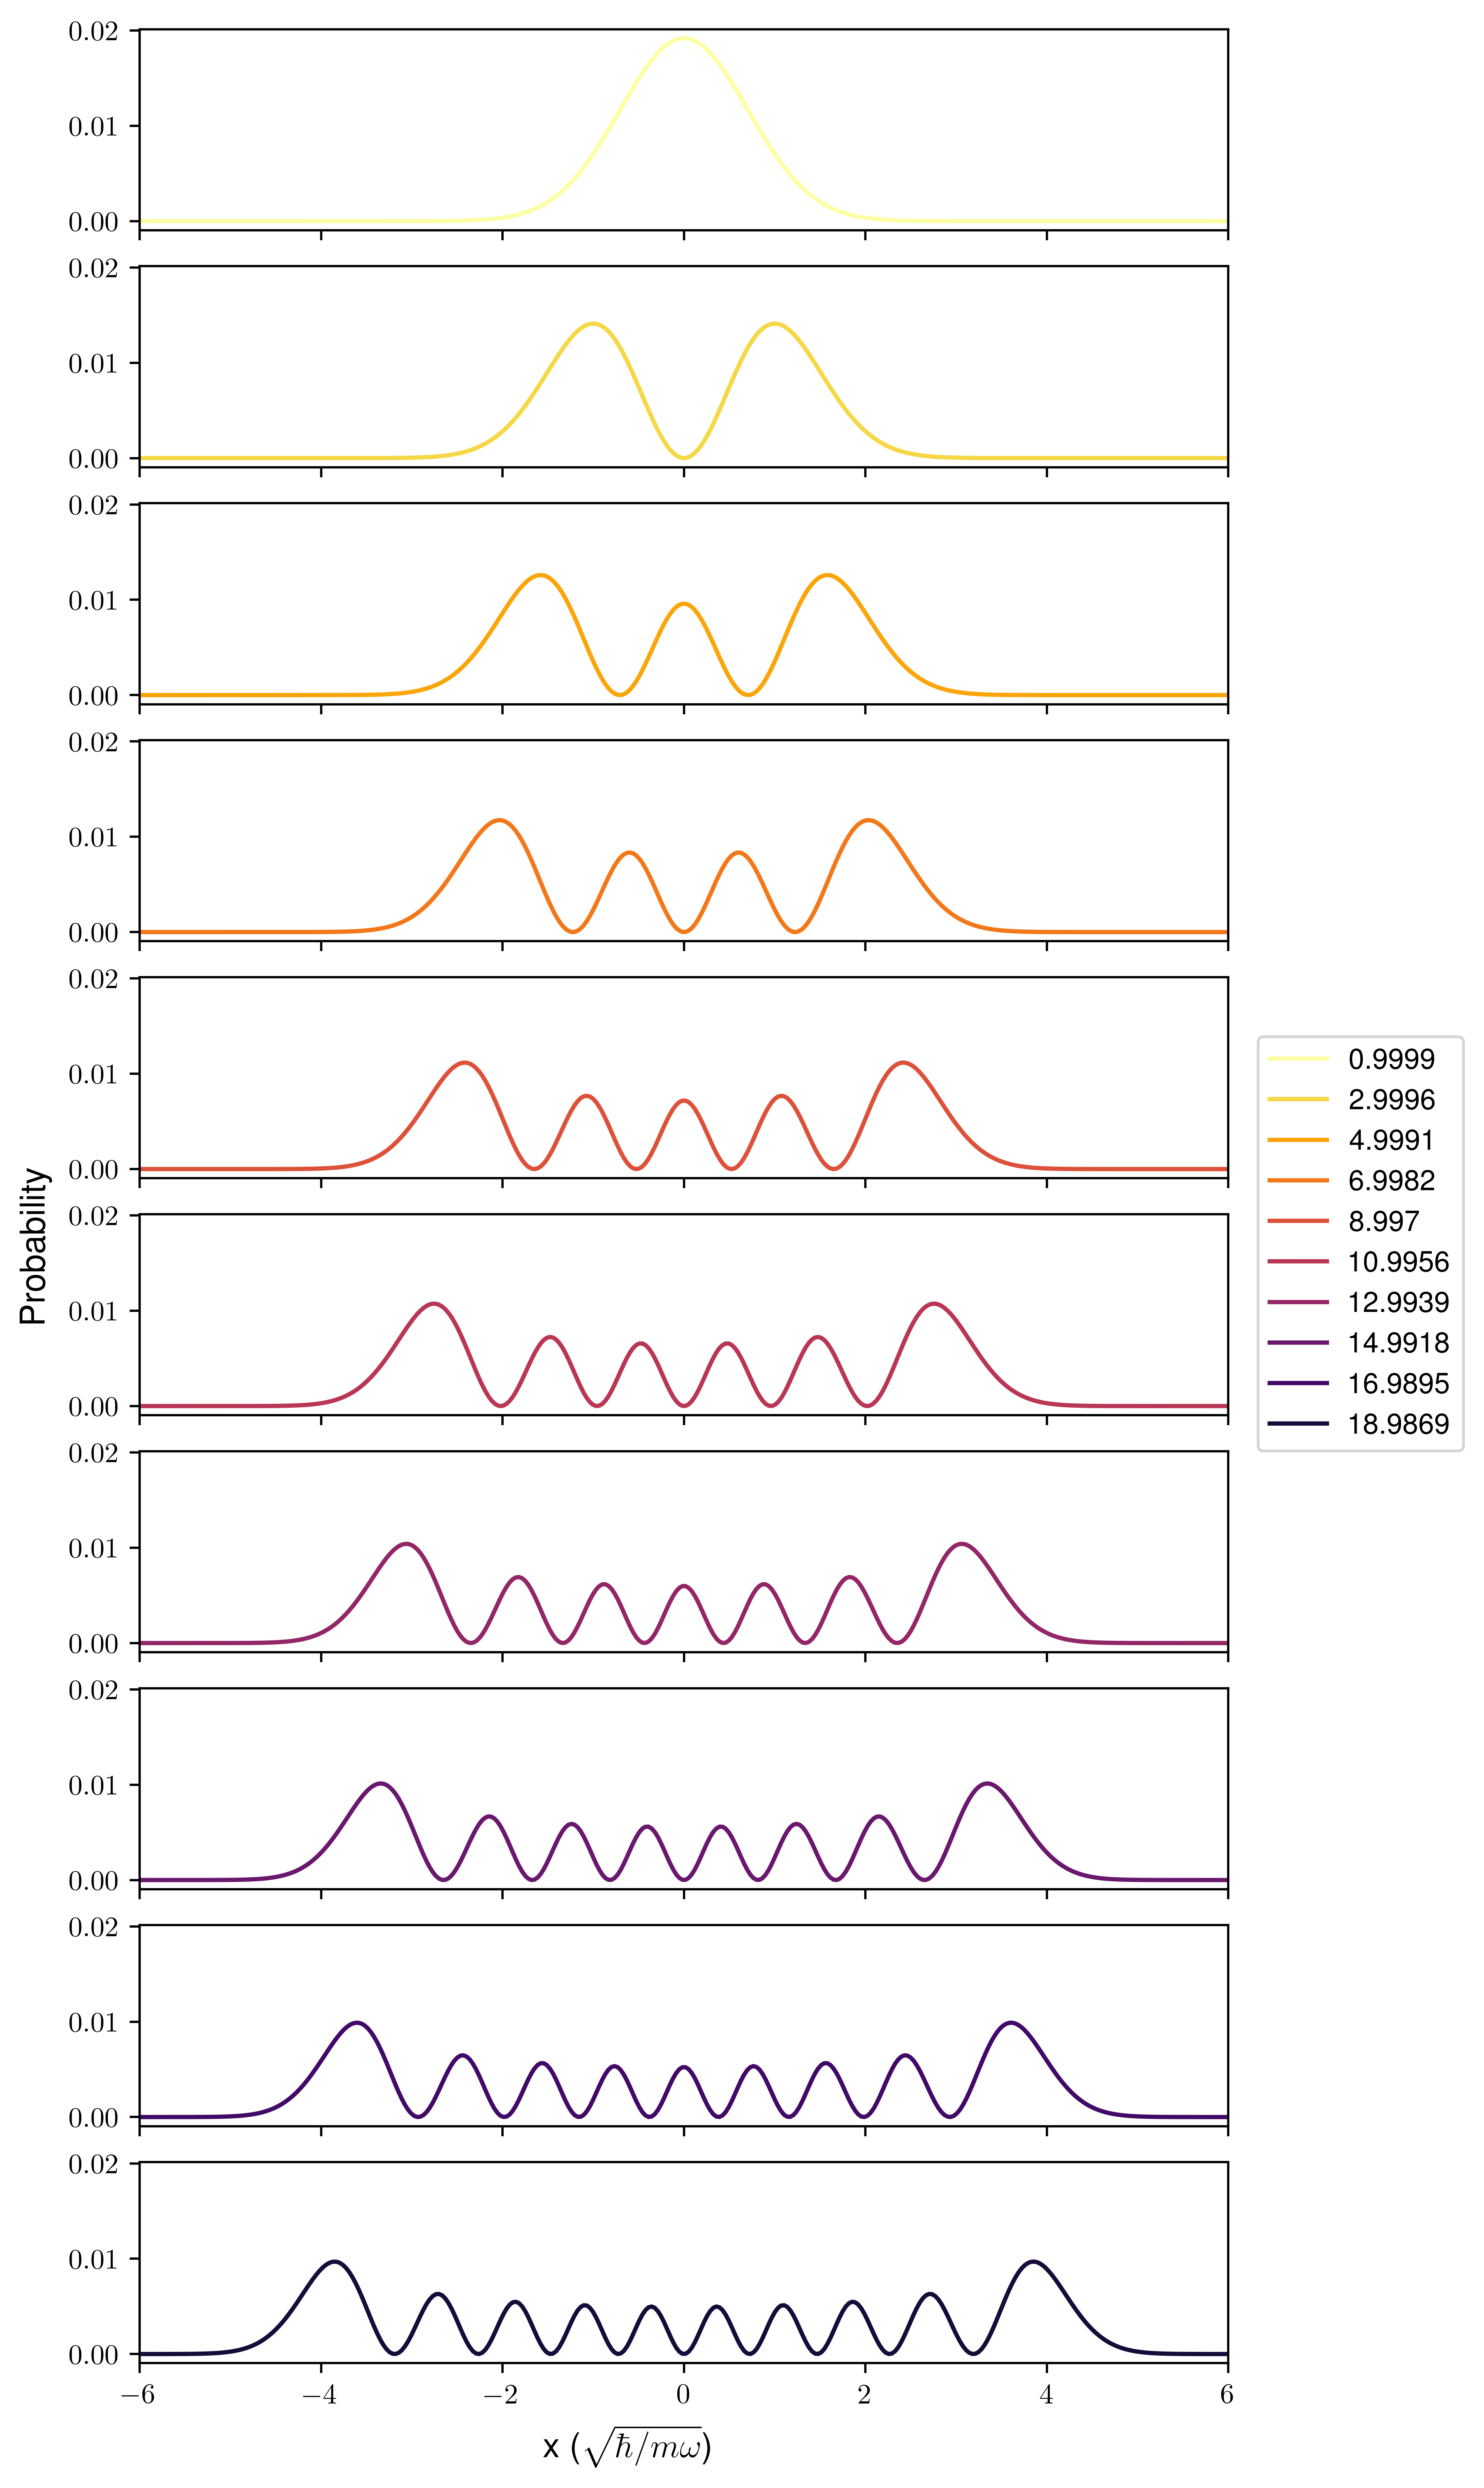

In [15]:
psi2=(np.square(evect))#find the probability densities

plots=10 #set up colors for each plot
cm  = plt.cm.inferno_r
col = [cm(int(x*cm.N/plots)) for x in range(plots)]

#Plot
fig,axs=plt.subplots(plots,1,dpi=700,sharex=True,sharey=True,constrained_layout=True,figsize=(6,12))
for i in range(0,plots):    
    axs[i].plot(x,psi2[:,i],label=str(round(evals[i],4)),color=col[i])
    axs[i].set_xlim(-6,6)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.supxlabel('x ($\sqrt{\hbar/m \omega}$)')
fig.supylabel('Probability')
plt.show()

# Part 4

Having verified our method, we can use it to find the eigenvalues of a more complex system - the Hydrogen atom.  In a spherically symmetric system, the wavefunction can be written :

$$\frac{1}{r}\Psi(r)Y_{lm}(\theta, \phi)e^{i m\phi}$$

where $Y_{lm}(\theta, \phi)$ are the spherical harmonic functions and l, m are the angular momentum quantum numbers. The radial function $\Psi(r)$ satisfies the time-independent Schrödinger equation, provided a suitable term is added to the potential.

If we use the Bohr radius $a_0$ as the unit $r$, where :
$$a_0 = \frac{4 \pi \epsilon \hbar^2}{m_e e^2}$$

then the energy will be measured in units of :
$$\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$$

and the potential for the hydrogen atom can be written :

$$V(r_i) = \frac{-2}{r_i} + \frac{l(l+1)}{r_i^2}$$

Write a function which takes as argument a discrete set of points, $r_i$, and returns the potential $V_i$. You should use a range of $r$ such that the wavefunction become negligible - 200 Bohr radii should be sufficient.  Note that $r$ must now be positive.

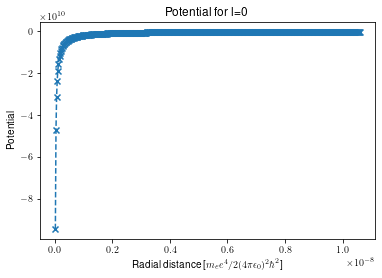

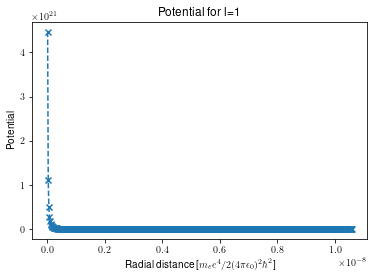

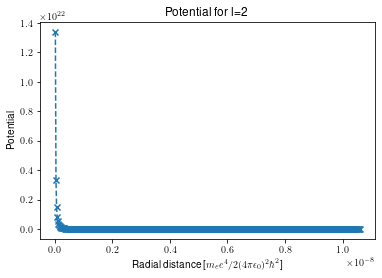

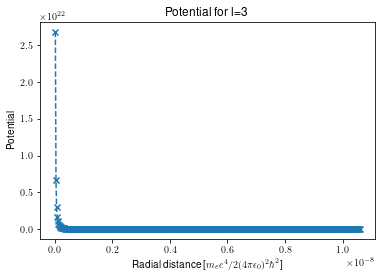

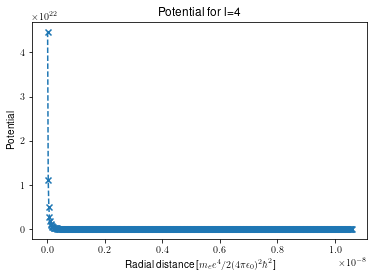

In [16]:

def potential_H(r,l):
    '''Function to find the potential of the hydrogen atom with r an array of radial distance from nucleus and l the angular momentum quantum number'''
    v = (-2/r) + (l*(l+1)/np.square(r))
    return v

bohr=const.physical_constants['Bohr radius'][0] #import bohr radius
rrange=200*bohr #x range (plus and minus)
dr=2*rrange/1001

x=np.arange(-rrange,rrange+dr,dr)#setup for 3d potential plotting
y=x
z=x

rr=np.arange(dr,rrange+dr,dr)#radial distance from nucleus. Minimum value set to dr in order to avoid dividing by zero and breaking code

'''Section for 3D plotting, omitted from final version due to time of calculation and limitations of the storage required for the calculation'''
#xx,yy,zz=np.meshgrid(x,y,z)
#r=np.sqrt(x**2 + y**2 + z**2)
#rrr=np.sqrt(xx**2 + yy**2 + zz**2)
#Vr=potential_H(r,0)

Vrr=potential_H(rr,0)

#Plot
for i in range(0,5):
    V=potential_H(rr,i)
    plt.figure()
    plt.scatter(rr,V,marker='x')
    plt.plot(rr,V,linestyle='dashed')
    plt.title('Potential for l='+str(i) )
    plt.xlabel('Radial distance [$m_e e^4/2 (4 \pi \epsilon_0)^2 \hbar^2$]')
    plt.ylabel('Potential')
    plt.show()
    


# X=xx#Vrr[0,:,:]
# Y=yy#Vrr[1,:,:]
# Z=zz#np.array([V,V])

# Plot

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# ax.scatter(0,0,0,color='black',marker='x')
# ax.scatter(X,Y,Z,c=np.log(Vr),marker='x',linewidths=0.05,alpha=0.05,cmap='magma_r')#, rstride=100, cstride=100,)

plt.show()



Now re-use the `hamiltonian()` function to generate the Hamiltonian matrix for the Hydrogen atom, and find at least the first 5 eigenvalues for at least l=0. Compare these eigenvalues with the expected eigenvalues.

In [17]:
HH,HD=hamiltonian(rr,Vrr)#find hamiltonian of radial wavefunction
print(HH)

e_val_vect=linalg.eig(HH)#find eigenvalues and eigenvectors of the hamiltonian using scipy linalg routines
evals=linalg.eigvals(HH)#find eigenvalues of the hamiltonian using scipy linalg routines
evects=e_val_vect[1]

sortarr=np.argsort(evals)#find location of eigenvalues from smallest to largest
evect=evects[:,sortarr]#sort eigenvectors from smallest to largest
evals=abs(np.sort(evals))#sort eigenvalues from smallest to largest

wavefunc=(1/rr)*evect*cmath.exp(0)#introduce radial component of wavefunction into full wavefunction, exponent set to 0 due to zero angular momentum
psi2=(np.square(wavefunc))





[[-9.45807908e+10 -2.23638158e+21  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.23638158e+21 -4.72903945e+10 -2.23638158e+21 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.23638158e+21 -3.15269291e+10 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.89538935e+08
  -2.23638158e+21  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.23638158e+21
  -1.89159854e+08 -2.23638158e+21]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -2.23638158e+21 -1.88782286e+08]]
[4.47267557e+21 4.47241282e+21 4.47197490e+21 4.47136184e+21
 4.47057367e+21 4.46961041e+21 4.46847210e+21 4.46715878e+21
 4.46567051e+21 4.46400735e+21 4.46216935e+21 4.46015660e+21
 4.45796917e+21 4.45560714e+21 4.45307062e+21 4.45035969e+21
 4.44747447e+21 4.44441506e+21 4.44118159e+21 4.43777419e+21
 4.43419298e+21 4.43043811e+21 4.42650973e+21 4.42240798e+2

Finally, as for the quantum harmonic oscillator, plot the wavefunctions.

c:\Users\adamt\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\adamt\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\adamt\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\adamt\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\adamt\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values t

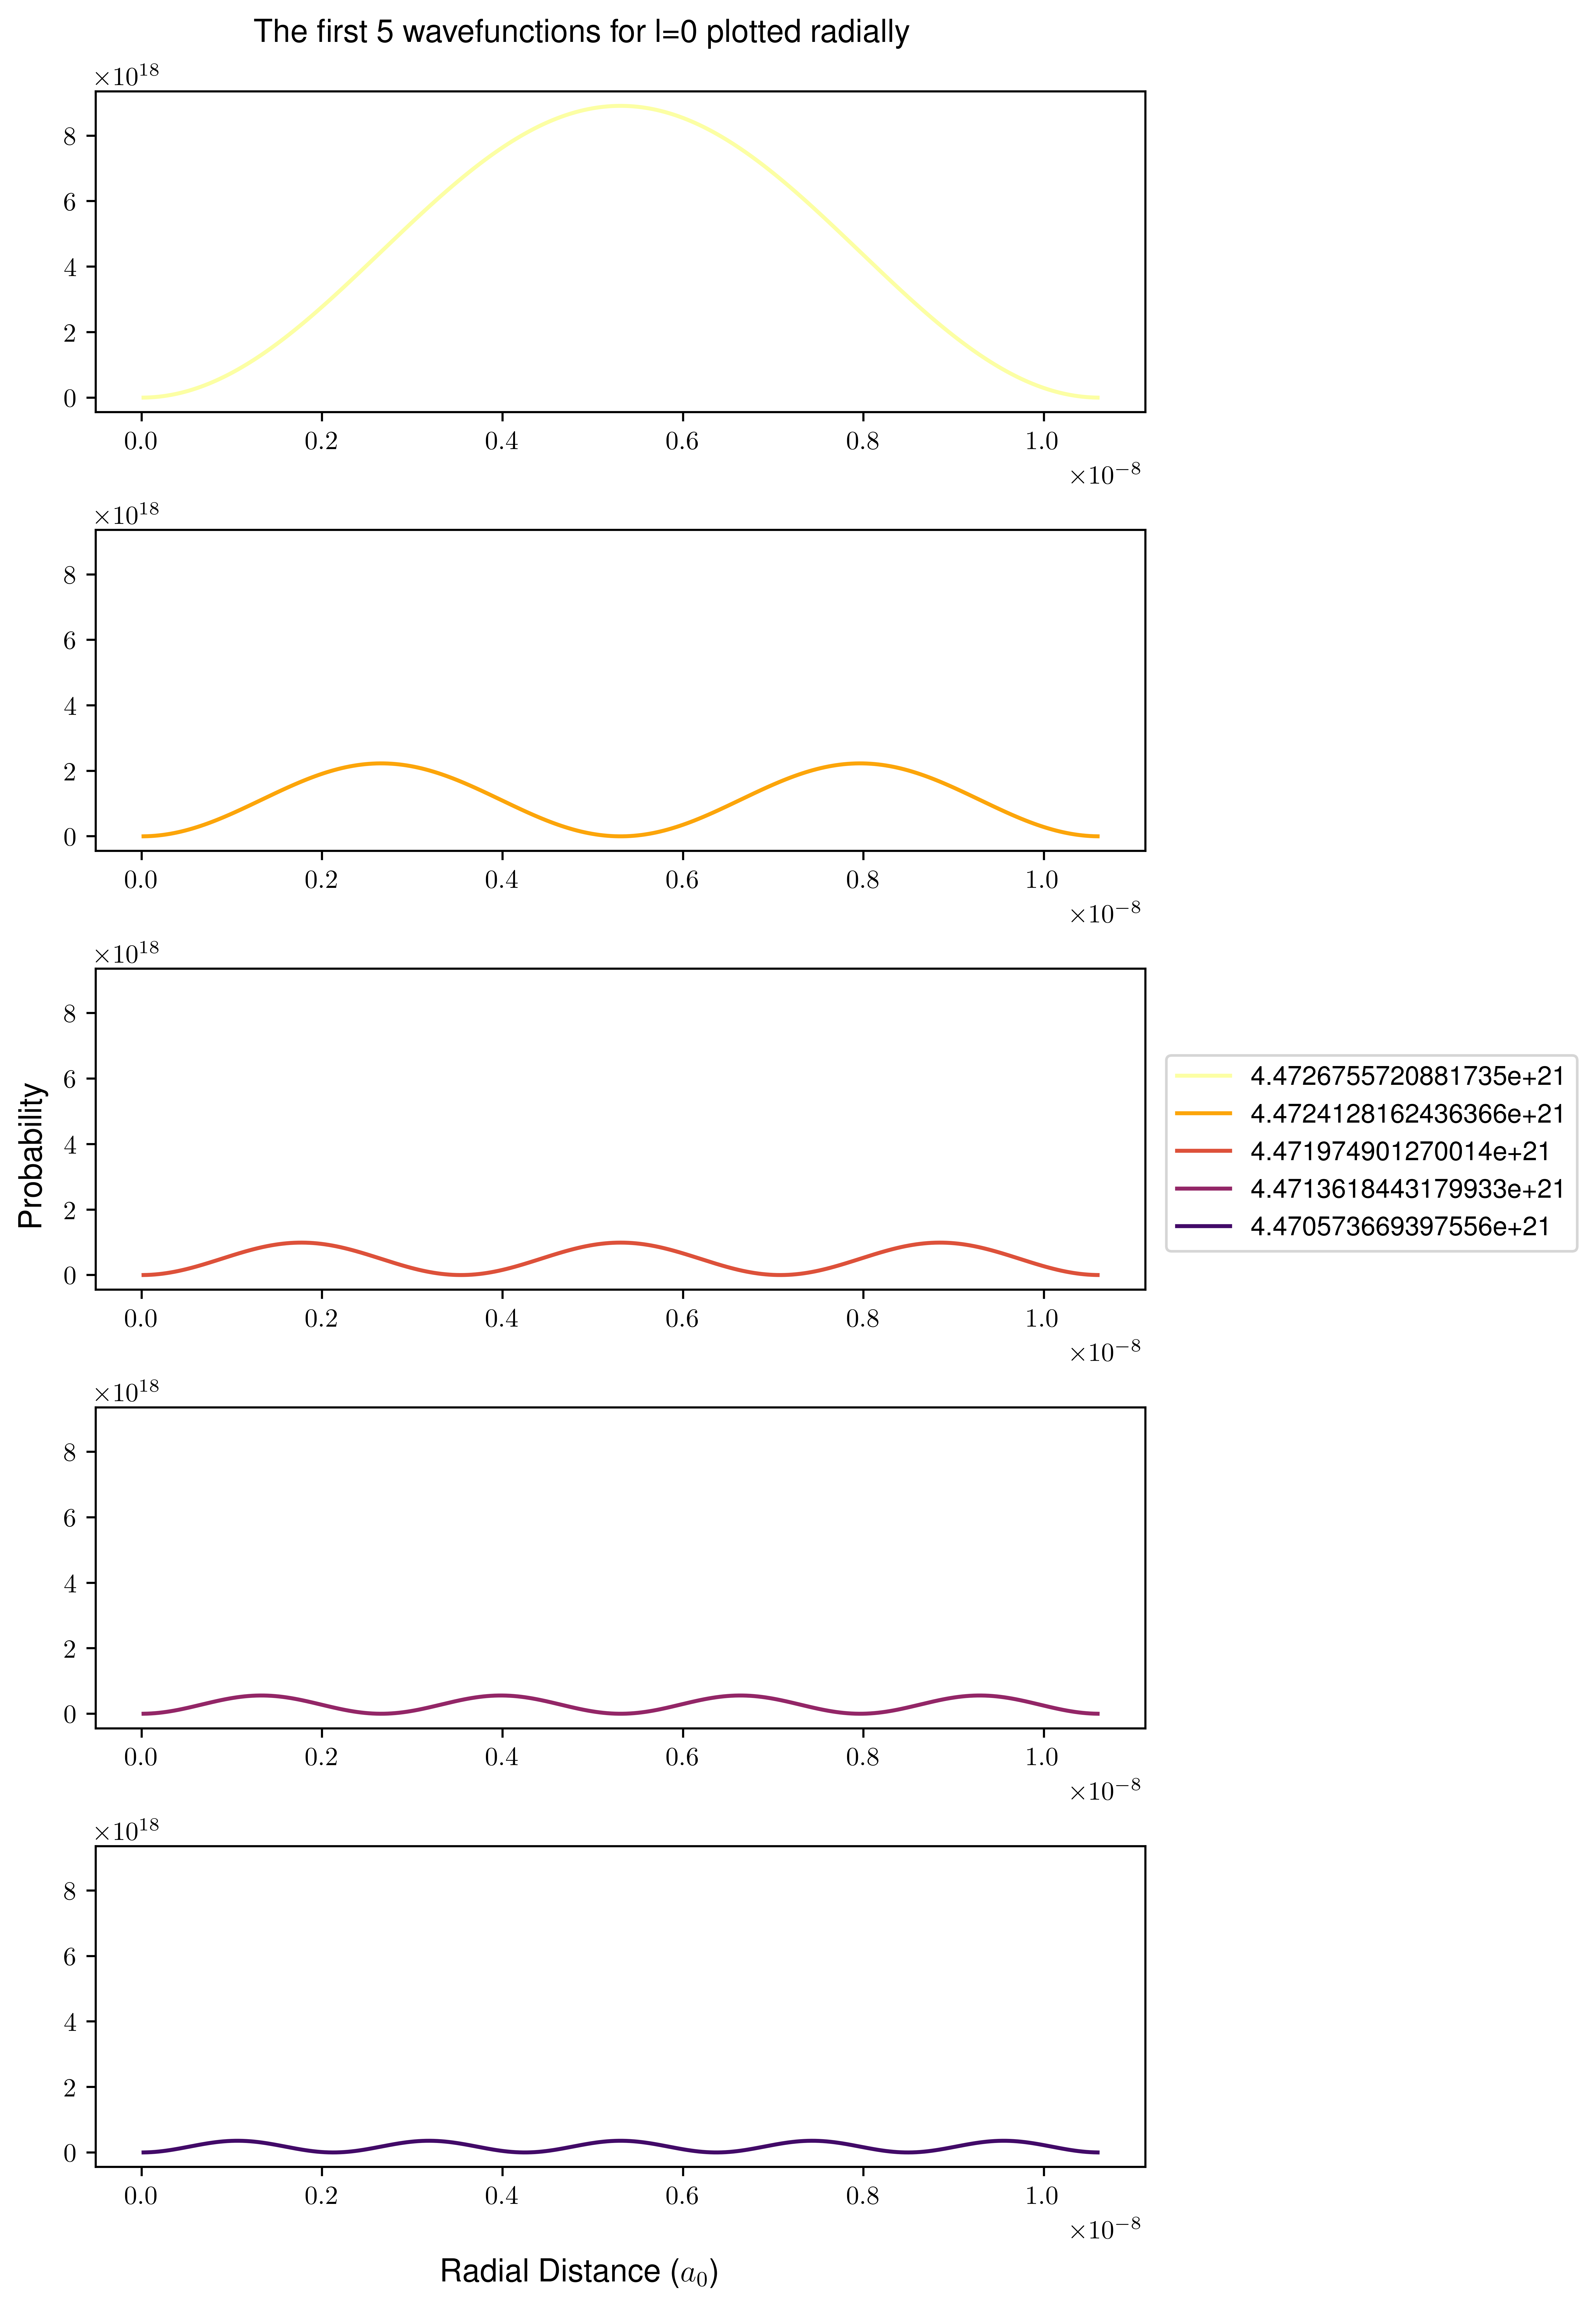

In [18]:
plots=5 #set up colors for each plot
cm  = plt.cm.inferno_r
col = [cm(int(x*cm.N/plots)) for x in range(plots)]

#Plot Wavefunctions
fig,axs=plt.subplots(plots,1,dpi=700,sharey=True,constrained_layout=True,figsize=(6,12))
for i in range(0,plots):    
    axs[i].plot(rr,psi2[:,i],label=str(round(evals[i],4)),color=col[i])
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('The first 5 wavefunctions for l=0 plotted radially')
fig.supxlabel('Radial Distance ($a_0$)')
fig.supylabel('Probability')

plt.show()

# Part 5

In the Markdown cell below, describe how your code solves the problem set. State any equations used in the solution and how they were obtained. Include your reasons for any libraries you used, as well as any particular programming techniques. Explain your choice of any test cases. Finally, state any salient features of the results you obtained. You are not expected to write more than about 250-300 words.

This code solves the problem by using numerical methods to find and calculate the Hamiltonian eigenvalues and eigenfunctions for the required situations. The Numpy and Scipy libraries were used as standard python tools for analysing the large data sets and matrix routines needed for this task. The Numpy library allows for the easy creation and manipulation of matrices and discrete data sets whilst Scipy provides streamlined numerical methods for their analysis. In particular, Scipy linear algebra routines are able to efficiently evaluate eigenvalues and eigenvectors which was extremely useful for this task. It is interesting to see the dominance of the radial term in the potential for the hydrogen atom, with only the potential for zero angular momentum (l=0) tending to negative infinity as the electron gets closer to the nucleus whilst the other values tend to positive infinity. For the quantum harmonic oscillator the eigenvalues calculated show good agreement with those expected, deviating slightly from integer values due to incaccuracies in numerical methods as opposed to analytical methods.